Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

## Loading Data and modules

In [51]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
sb.set()

In [52]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.to_csv('titanic.csv',index=False)

In [4]:
del titanic

In [5]:
titanic = pd.read_csv('titanic.csv')

In [53]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [54]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
x = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [56]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [57]:
y = pd.DataFrame(titanic['Survived'])
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [58]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

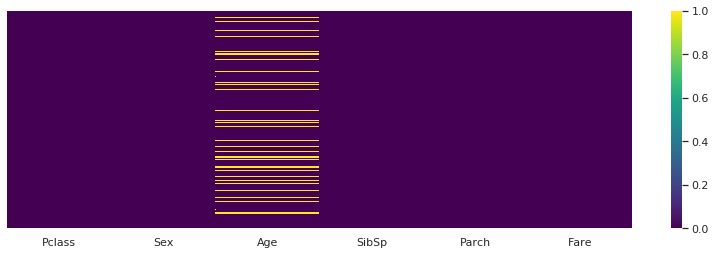

In [59]:
plt.figure(figsize=(14,4))
sb.heatmap(x.isnull(),yticklabels=False,linewidths=0,cbar=True,cmap='viridis')
plt.show()

In [60]:
titanic['Pclass'].unique()

array([3, 1, 2])

In [61]:
x.groupby(['Pclass']).median()

,Age,SibSp,Parch,Fare
Pclass,,,,
1,37.0,0,0,60.2875
2,29.0,0,0,14.2500
3,24.0,0,0,8.0500


In [62]:
def imputer(col):   
    if pd.isnull(col[0]):
        if col[1] == 1:
            return 37
        if col[1] == 2:
            return 29
        if col[1] == 3:
            return 24
    else:
        return col[0]

In [63]:
x['Age'] = x[['Age','Pclass']].apply(imputer,axis=1)

/home/bibekananda/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
x['Age'].isna().sum()

0

In [65]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [66]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

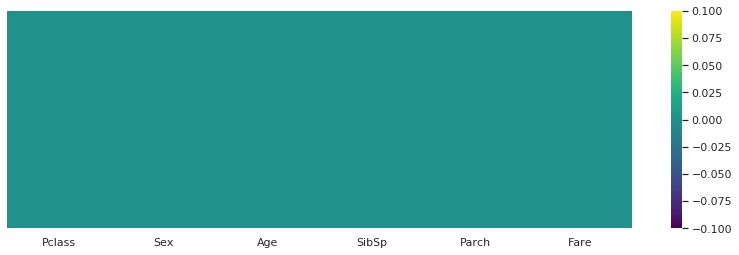

In [67]:
plt.figure(figsize=(14,4))
sb.heatmap(x.isnull(),yticklabels=False,linewidths=0,cbar=True,cmap='viridis')
plt.show()

In [68]:
sex = pd.get_dummies(x['Sex'],drop_first=True)

In [69]:
del x['Sex']

In [70]:
x=pd.concat([x,sex],1).copy()

In [71]:
x.head(5)

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [72]:
frame = [x,y]
df = pd.concat(frame,axis=1)
df.head()

,Pclass,Age,SibSp,Parch,Fare,male,Survived
0,3,22.0,1,0,7.2500,1,0
1,1,38.0,1,0,71.2833,0,1
2,3,26.0,0,0,7.9250,0,1
3,1,35.0,1,0,53.1000,0,1
4,3,35.0,0,0,8.0500,1,0


In [73]:
cor = df.corr()
cor

,Pclass,Age,SibSp,Parch,Fare,male,Survived
Pclass,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900,-0.338481
Age,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.047255
SibSp,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.035322
Parch,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489,0.081629
Fare,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333,0.257307
male,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.543351
Survived,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351,1.000000


Pearson Co-relation  of independent-features with target feature :-


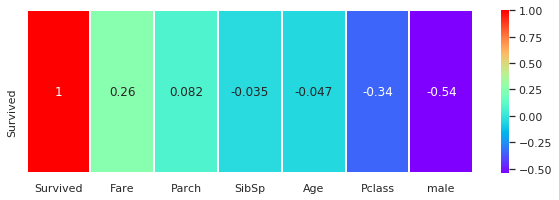

In [74]:
print('Pearson Co-relation  of independent-features with target feature :-')
plt.figure(figsize=(10,3))
cor=cor[['Survived']].sort_values(by='Survived',ascending=False)
sb.heatmap(cor.T,annot=True,linewidths=1,cmap='rainbow',cbar=True)
plt.show()

## EDA

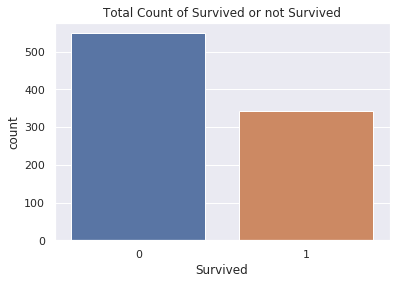

In [81]:
sb.countplot(df['Survived'])
plt.title('Total Count of Survived or not Survived')
plt.show()

In [83]:
male = df[df['male']==1]
female = df[df['male']==0]

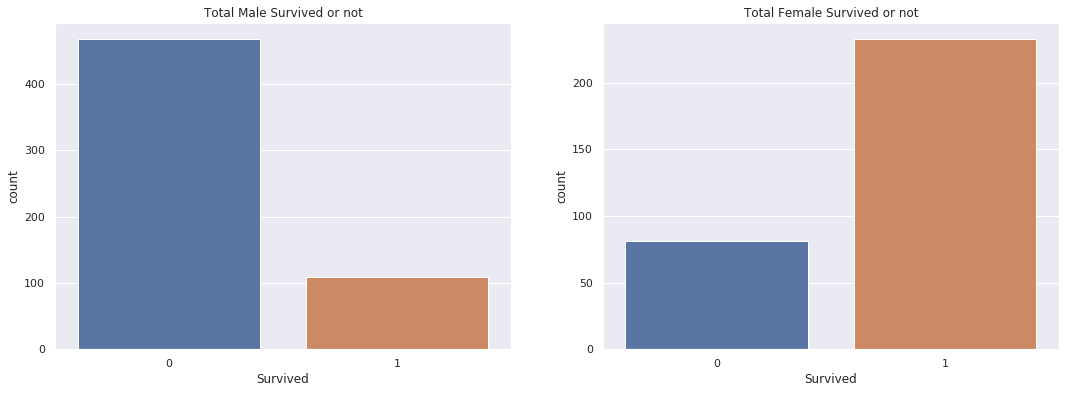

In [85]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
sb.countplot(male['Survived'],ax=ax1)
ax1.set_title('Total Male Survived or not')
sb.countplot(female['Survived'],ax=ax2)
ax2.set_title('Total Female Survived or not')
plt.show()

<Figure size 1440x1440 with 0 Axes>

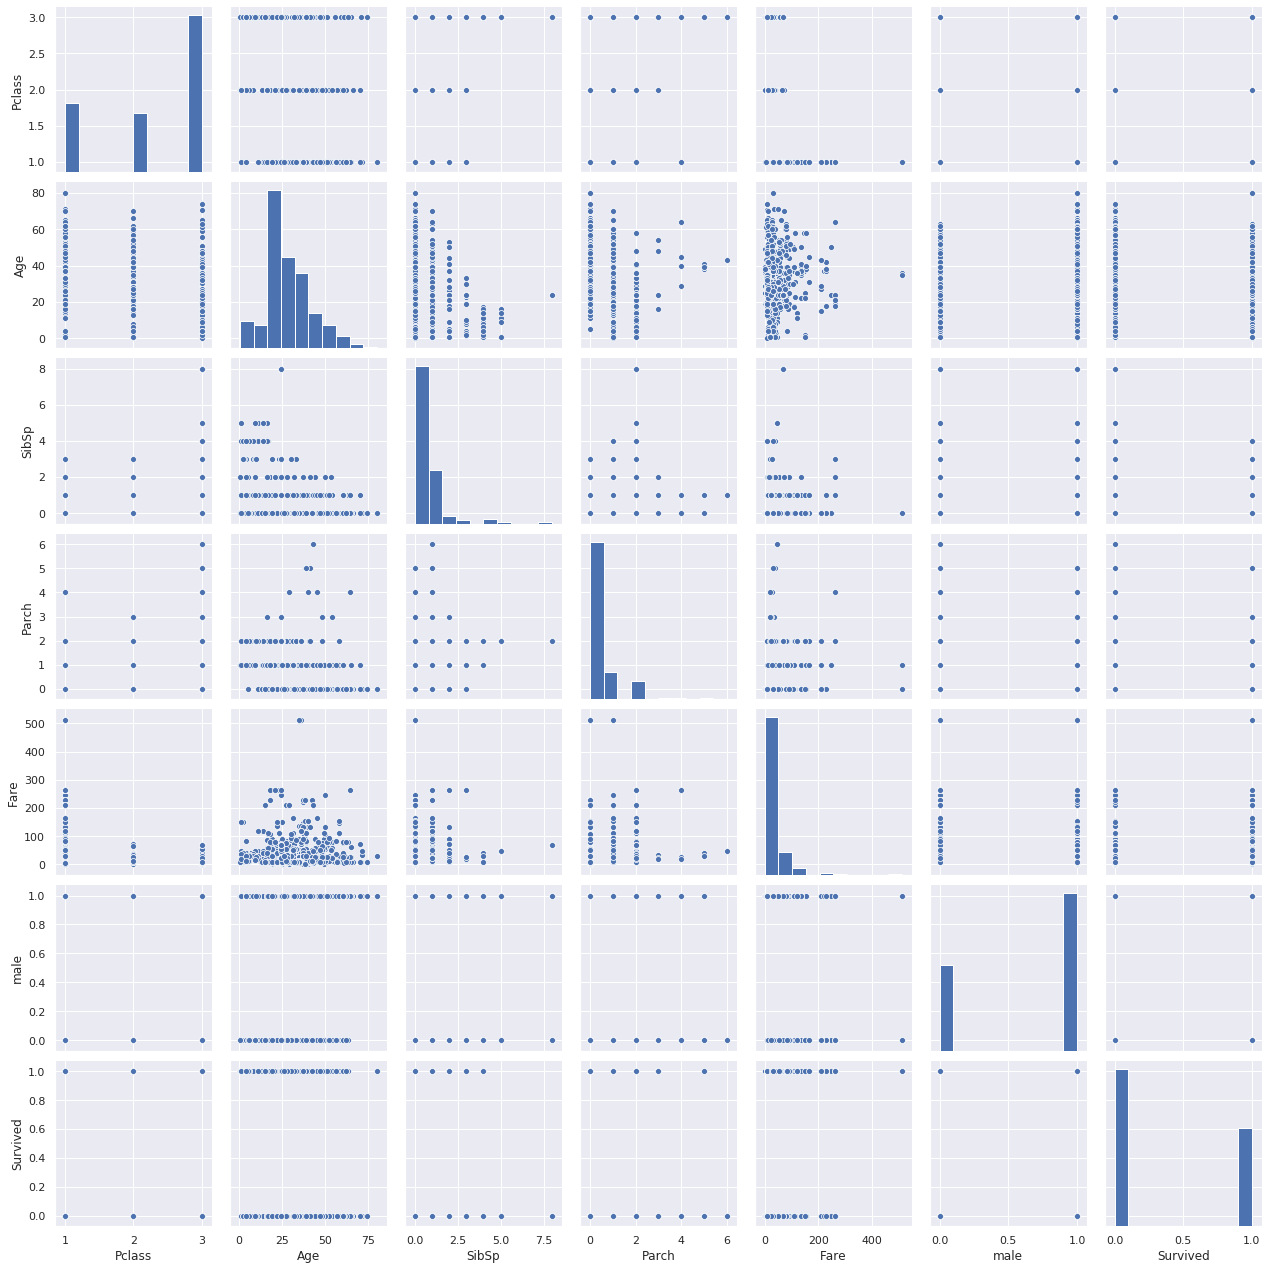

In [89]:
plt.figure(figsize=(20,20))
sb.pairplot(df)
plt.show()

In [91]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

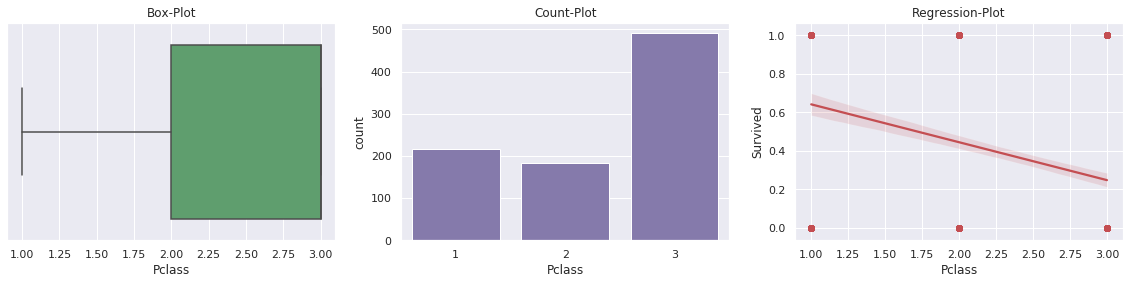

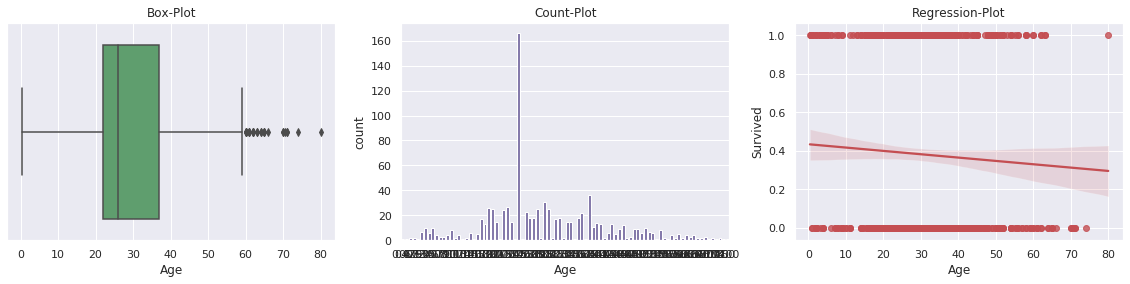

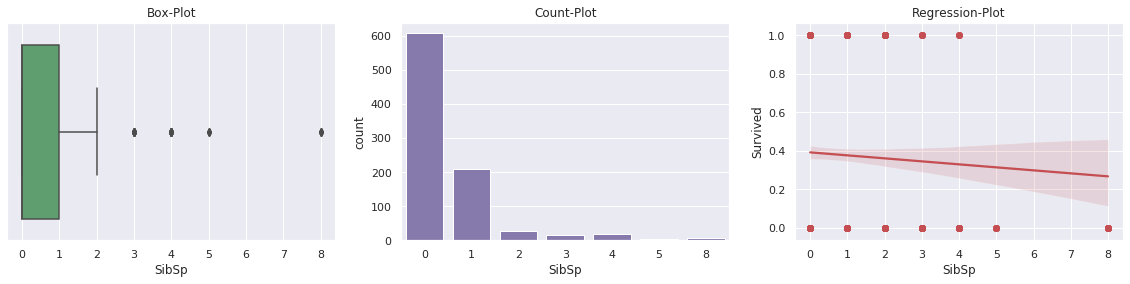

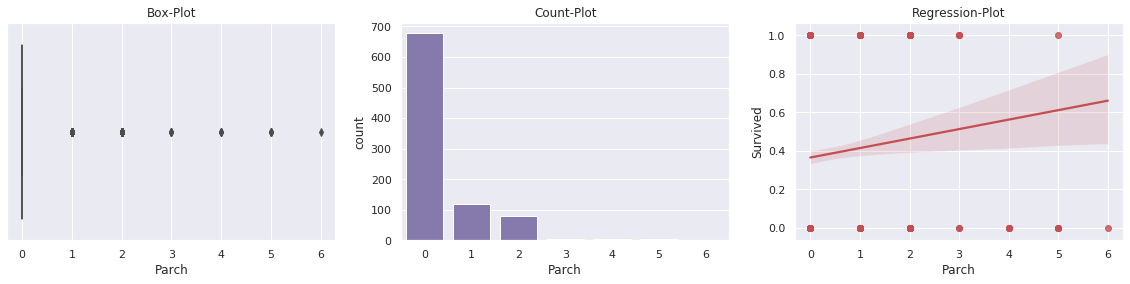

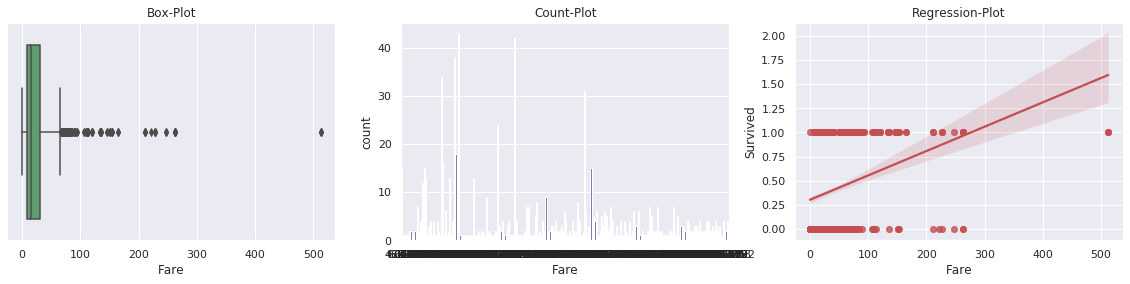

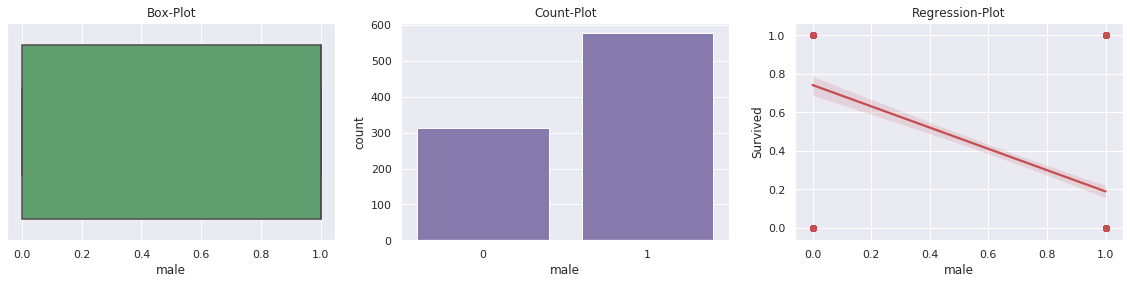

In [101]:
for i in x.columns:
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,4))
    b = x[i]
    c= y['Survived']
    sb.boxplot(b,color='g',ax=ax1)
    sb.countplot(b,color='m',ax=ax2)
    sb.regplot(b,c,color='r',ax=ax3)
    ax1.set_title("Box-Plot")
    ax2.set_title("Count-Plot")
    ax3.set_title("Regression-Plot")
    plt.show()

In [102]:
x.shape

(891, 6)

In [103]:
y = df['Survived'].copy()

In [104]:
x= df.drop(['Parch','Survived'],1)

In [105]:
x.head()

,Pclass,Age,SibSp,Fare,male
0,3,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,3,35.0,0,8.0500,1


In [106]:
dtr = DecisionTreeClassifier(random_state=3)

In [107]:
def Train_model(clf,x,y,rs=42):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.30,
                                                     random_state = rs,stratify=y)
    
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'random state:{rs} & accuracy:{round(accuracy,2)}')    

In [108]:
for i in range(10):
    Train_model(dtr,x,y,rs=i)
 

random state:0 & accuracy:0.79
random state:1 & accuracy:0.8
random state:2 & accuracy:0.78
random state:3 & accuracy:0.82
random state:4 & accuracy:0.8
random state:5 & accuracy:0.79
random state:6 & accuracy:0.76
random state:7 & accuracy:0.82
random state:8 & accuracy:0.79
random state:9 & accuracy:0.76


In [109]:
Train_model(dtr,x,y,rs=3)

random state:3 & accuracy:0.82


## GridSearch CV

In [110]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(10,30,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,10,1),
    'random_state':[0,3,7,71,88]
    
}

In [111]:
grid = GridSearchCV(estimator=dtr,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1,iid=False)

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.30,
                                                     random_state = 3,stratify=y)
grid.fit(x_train,y_train)
best_parameters = grid.best_params_
print(best_parameters)
    

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 9, 'random_state': 3}


/home/bibekananda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [113]:
dtr = DecisionTreeClassifier(criterion='gini', max_depth= 10, min_samples_leaf= 1, 
                             min_samples_split= 9, random_state=3)

In [114]:
dtr

DecisionTreeClassifier(max_depth=10, min_samples_split=9, random_state=3)

## K-Fold Cross Validation

In [115]:

def CV_train(clf,x,y,n=5):
    kf = KFold(n_splits=n) 
    kf.get_n_splits(x) 

    accu = []
    for train_index, test_index in kf.split(x):
        xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
        ytrain,ytest = y.iloc[train_index],y.iloc[test_index]
        clf.fit(xtrain,ytrain)
        pred = clf.predict(xtest)
        acc = accuracy_score(pred,ytest)
        accu.append(acc)
    prediction = clf.predict(x)
    ac = accuracy_score(prediction,y)
    print(f"| CV: {n} | Mean Accuracy:{round(np.mean(accu)*100,2)}% | Over all Accuracy:{round(ac*100,2)}% |")

**CV-Tuning**

In [116]:
for i in range(4,15):
    CV_train(dtr,x,y,n=i)

| CV: 4 | Mean Accuracy:80.25% | Over all Accuracy:89.0% |
| CV: 5 | Mean Accuracy:81.59% | Over all Accuracy:89.45% |
| CV: 6 | Mean Accuracy:80.36% | Over all Accuracy:90.01% |
| CV: 7 | Mean Accuracy:81.38% | Over all Accuracy:89.67% |
| CV: 8 | Mean Accuracy:82.38% | Over all Accuracy:89.79% |
| CV: 9 | Mean Accuracy:81.71% | Over all Accuracy:89.79% |
| CV: 10 | Mean Accuracy:80.59% | Over all Accuracy:90.01% |
| CV: 11 | Mean Accuracy:81.93% | Over all Accuracy:90.35% |
| CV: 12 | Mean Accuracy:82.5% | Over all Accuracy:90.35% |
| CV: 13 | Mean Accuracy:81.59% | Over all Accuracy:89.9% |
| CV: 14 | Mean Accuracy:81.27% | Over all Accuracy:89.79% |


In [117]:
CV_train(dtr,x,y,n=12)

| CV: 12 | Mean Accuracy:82.5% | Over all Accuracy:90.35% |


In [118]:
y_pred = dtr.predict(x_test)

In [119]:
test_prediction = dtr.predict(x_test)

In [120]:
acu = accuracy_score(test_prediction ,y_test)
print("Test Accuracy from model->'dtr' with CV:",round(acu*100,2),'%')

Test Accuracy from model->'dtr' with CV: 92.16 %


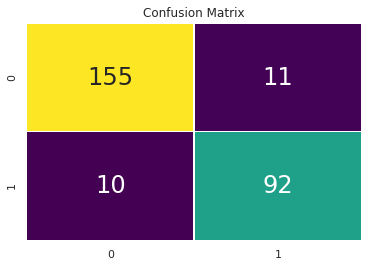

In [121]:
confus = confusion_matrix(test_prediction,y_test)
plt.rcParams['font.size'] = 24
sb.heatmap(confus,annot=True,cbar=False,cmap='viridis',linewidths=0.5,fmt='.4g')
plt.title('Confusion Matrix')
plt.show()

In [122]:
TP = confus[0][0]
TP

155

In [123]:
TN = confus[1][1]
TN

92

In [124]:
FP = confus[0][1]
FP

11

In [125]:
FN = confus[1][0]
FN

10

In [126]:
accuracy = (TP+TN)/(TP+TN+FN+FP)
print("ACCURACY:",round(accuracy*100,2),'%')

ACCURACY: 92.16 %


In [127]:
precision = TP/(TP+FP)
print('PRECISION IS:',round(precision,2))

PRECISION IS: 0.93


In [128]:
recall = TP/(TP+FN)
print('RECALL IS:',round(recall,2))

RECALL IS: 0.94


In [129]:
F1_Score = 2*(recall * precision) / (recall + precision)
print("F1_Score is:",round(F1_Score,2))

F1_Score is: 0.94


In [130]:
auc = roc_auc_score(y_test, test_prediction)
print("Area Under Curve:",round(auc,2))

Area Under Curve: 0.92


In [131]:
fpr, tpr, thresholds = roc_curve(y_test, test_prediction)
print("False Positive Rate will be:",fpr[1])
print("True Positive Rate will be:",tpr[1])


False Positive Rate will be: 0.06060606060606061
True Positive Rate will be: 0.8932038834951457


### ROC-Curve

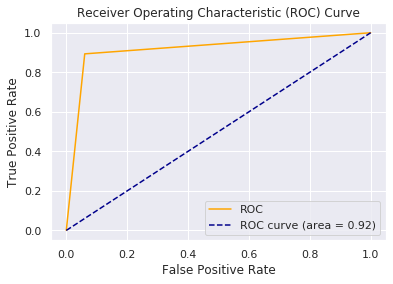

In [132]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### prediction from any index

In [133]:
def preda(index=0):
    try:
        pred = dtr.predict(x)
        p= pred[index]
        if p == 0:
            print("Couldn't Survive")
        elif p == 1:
            print("Survived")
    except:
        print("Index Error..")
        print(f"Please Enter index upto:{len(x)-1}")
    

In [134]:
preda(10)

Survived


In [135]:
preda(100)

Couldn't Survive


In [136]:
preda(890)


Couldn't Survive


In [137]:
preda(891)

Index Error..
Please Enter index upto:890


### prediction from single data

In [138]:
data = [[3,20,0,8,0]]
def prediction(data):
    cls = {0:"Not Survived",1:"Survived"}
    pred = dtr.predict(data)[0]
    print(cls[pred])
    

In [139]:
prediction(data)

Survived


**----------------------------------------------------------------------------------------------**